In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load dataset

In [2]:
train_df = pd.read_csv('./Data/train.csv')
train_df
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Descriptive statistics summary of the data

In [4]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

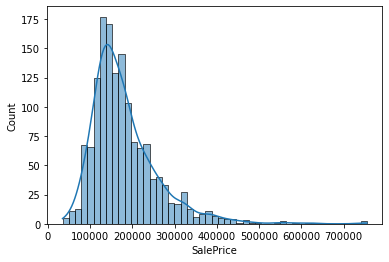

In [5]:
sns.histplot(train_df['SalePrice'], kde = True)

### Skewness

The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.\
Negative values for the skewness indicate data that are skewed left\
Positive values for the skewness indicate data that are skewed right

In [6]:
Skewness = round(train_df['SalePrice'].skew(), 3)
print('Skewness: {}'.format(Skewness))

Skewness: 1.883


### Kurtosis
This definition is used so that the standard normal distribution has a kurtosis of zero\
With the second definition positive kurtosis indicates a "heavy-tailed" distribution\
Negative kurtosis indicates a "light tailed" distribution

In [ ]:
Kurtosis = round(train_df['SalePrice'].kurtosis(), 3)
print('Kurtosis: {}'.format(Kurtosis))

## Correlation Analysis

* Scatterplt: grlivarea (above ground living area square feet) and Saleprice >>> Positive

[Text(0, 0.0, '100K'),
 Text(0, 100000.0, '$200K'),
 Text(0, 200000.0, '$300K'),
 Text(0, 300000.0, '$400K'),
 Text(0, 400000.0, '$500K'),
 Text(0, 500000.0, '$600K'),
 Text(0, 600000.0, '$700K'),
 Text(0, 700000.0, '$800K'),
 Text(0, 800000.0, '')]

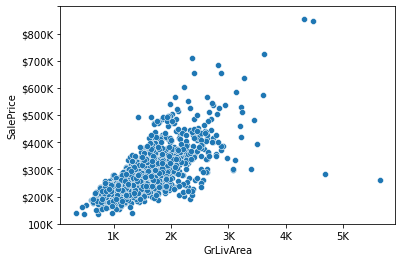

In [7]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
g = sns.scatterplot(x = var, y = 'SalePrice', data = train_df)
g.set(ylim=(0, 800000))
g.set_xticklabels(['0','1K','2K','3K','4K','5K', '6K'])
g.set_yticklabels(['100K', '$200K', '$300K', '$400K', '$500K', '$600K', '$700K', '$800K']);

* Linear Regression: TotalBsmtSF (total square feet of basement area) and Saleprice >>> Positive

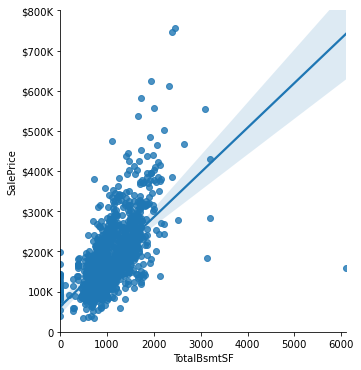

In [11]:
data = train_df[['TotalBsmtSF', 'SalePrice']]
g = sns.lmplot( x = 'TotalBsmtSF', y = 'SalePrice', data = data)
g.set(ylim=(0, 800000))
g.set_yticklabels(['0', '100K', '$200K', '$300K', '$400K', '$500K', '$600K', '$700K', '$800K']);

* Boxplot: OverallQualq (the rate of overall material and finish of the house) and Saleprice >>> Positive

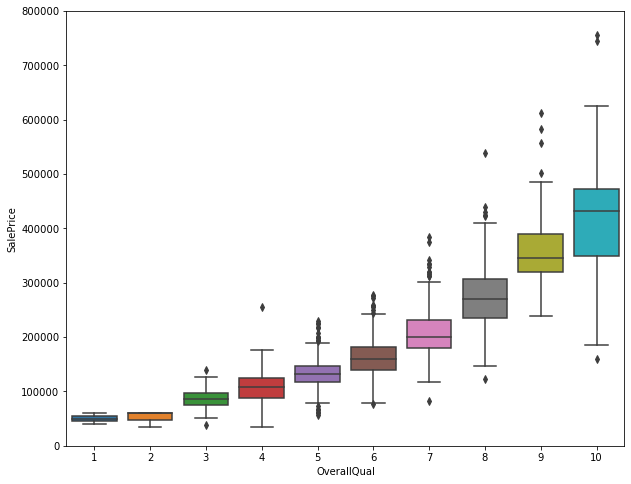

In [14]:
data = train_df[['OverallQual', 'SalePrice']]
f, ax = plt.subplots(figsize=(10, 8))
g = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train_df)
g.set(ylim=(0, 800000));

# create a figure with subplot of 2 rows and 1 columns
# fig, ax = plt.subplots(2,1)

* Scatterplot: YearBuilt and Saleprice >>> modereatly positive

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

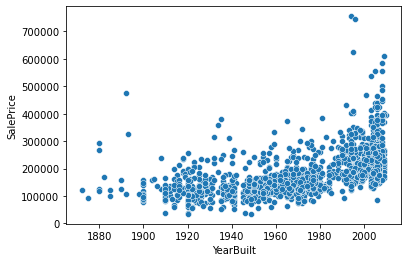

In [17]:
data = train_df[['YearBuilt', 'SalePrice']]
sns.scatterplot(
    x = 'YearBuilt',
    y = 'SalePrice',
    data = data)

* Barchart and line chart(10years timeframe): YearBuilt and Saleprice >>> Increasing trend over time

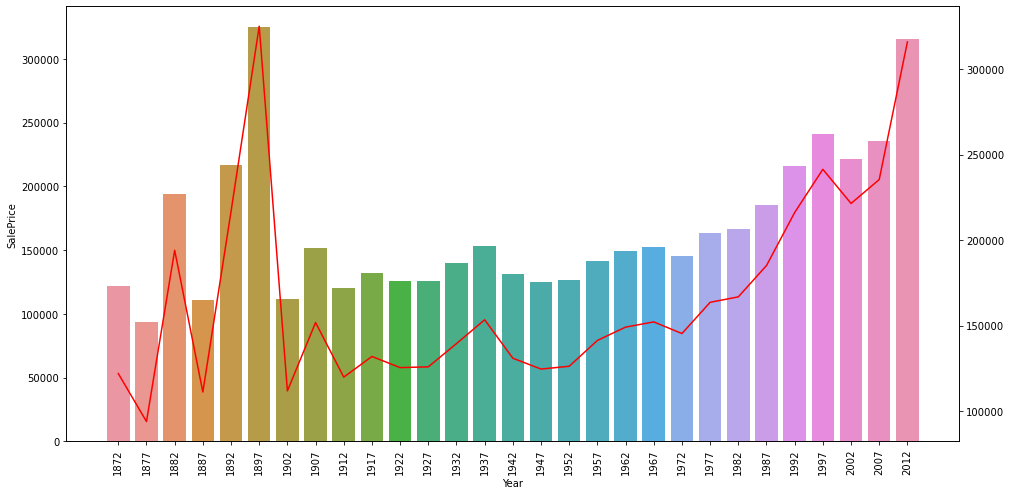

In [18]:
data_YearBuilt = train_df[['YearBuilt', 'SalePrice']]
# convert year column to datetime
data_YearBuilt['YearBuilt'] = pd.to_datetime(data_YearBuilt['YearBuilt'], format='%Y')
# set year column as index
data_YearBuilt = data_YearBuilt.set_index('YearBuilt', drop = True)
data_YearBuilt
# resample time series with 10 yrs
data_YearBuilt_decades = data_YearBuilt.resample('5Y')
data_YearBuilt_decades = data_YearBuilt_decades.mean()
data_YearBuilt_decades

# create Year column and convert it back to string for visulization
data_YearBuilt_decades['Year'] = data_YearBuilt_decades.index
data_YearBuilt_decades = data_YearBuilt_decades.reset_index(drop=True)
data_YearBuilt_decades['Year'] = data_YearBuilt_decades['Year'].astype(str)
data_YearBuilt_decades['Year'] = data_YearBuilt_decades['Year'].apply(lambda x: x[:4])
data_YearBuilt_decades

# a line chart and barplot with mean sale price over years
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation=90)
ax = sns.barplot(
    x = 'Year',
    y = 'SalePrice',
    data = data_YearBuilt_decades)
ax2 = ax.twinx()
ax2.plot(data_YearBuilt_decades['Year'], data_YearBuilt_decades['SalePrice'], color = 'r')

* Boxplot: YearBuilt/SalePrice >>> not a strong tendency, 'SalePrice' is more likely to increase in newly built than in old time

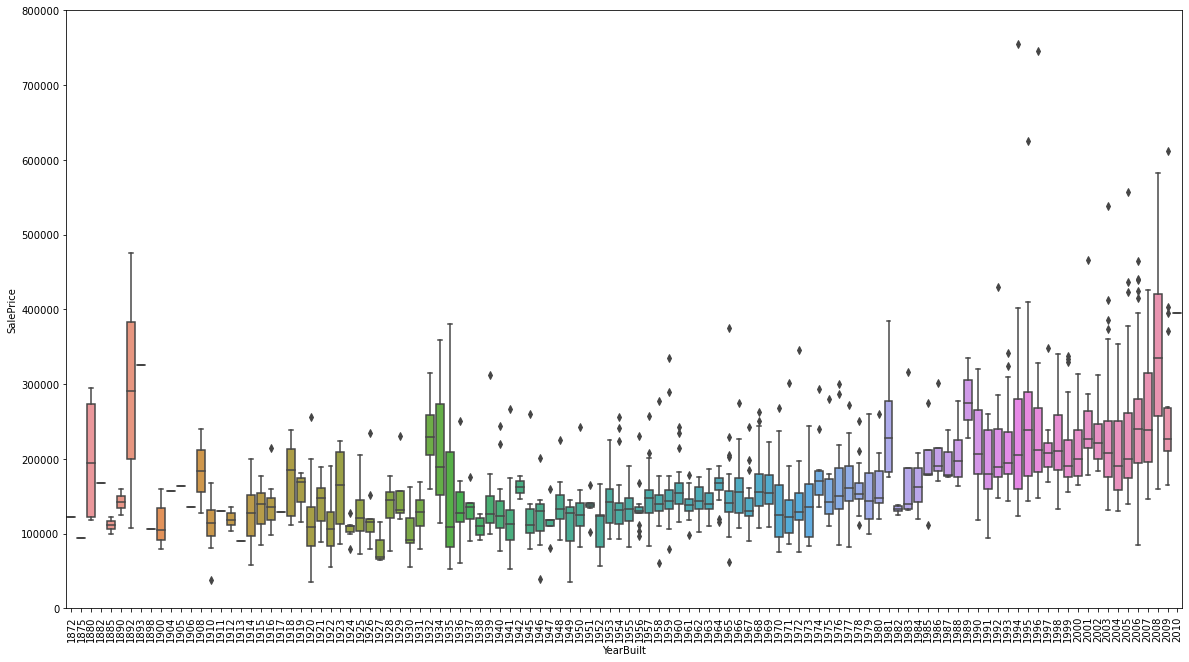

In [21]:
data = train_df[['YearBuilt', 'SalePrice']]
f, ax = plt.subplots(figsize=(20, 11))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Summary
* GrLivArea and SalesPrice are positely correalted that when GrLivArea increases, SalesPrice is prone to be increased
* TotalBsmtSF is positively affecting the Saleprice, implying a causual relationship bewteen 2 variables
* OverallQual seem to be strongly related with SalePrice, as the bosplot shows how SalePrice is stongly increased with a higher rate of quality
* Although from 1892-1897 saw a surging SalePrice, SalePrice, in general, positively related with YearBuilt as well

## Further Objective Exploratary
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

* Heatmap: overview correlation

<AxesSubplot:>

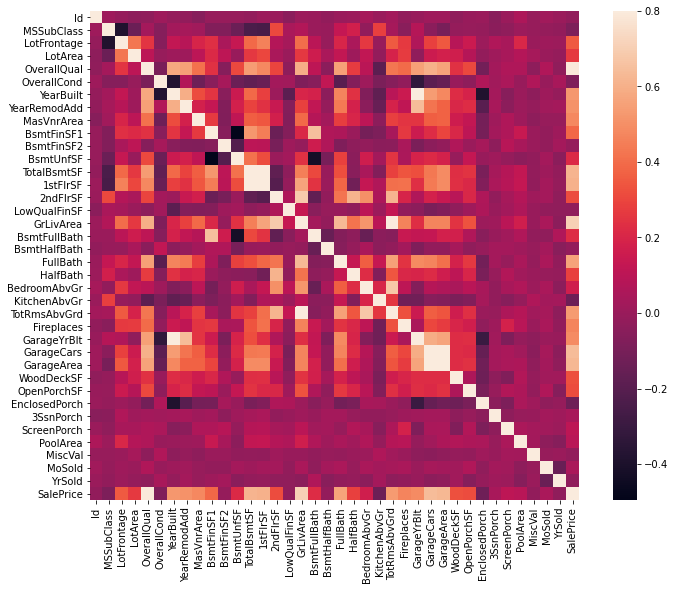

In [22]:
# Correlation matrix
corrmat = train_df.corr()
corrmat
# create a heatmap for the matrix
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax= .8, square=True)

* Heatmap: correlation coefficent of top10 variables

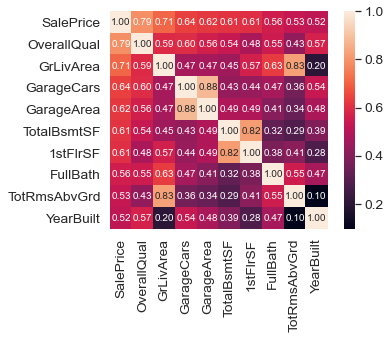

In [23]:
# Return the first 10 rows ordered by SalePrice columns in descending order.
top10_cols = corrmat.nlargest(10, 'SalePrice')
# Get rows in the SalePrice column only > get their index
top10_cols = top10_cols['SalePrice'].index
# writing rows as columns and vice-versa
cm = np.corrcoef(train_df[top10_cols].T)
cm
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=top10_cols.values, annot_kws={'size': 10}, xticklabels=top10_cols.values)

### Insights from Heatmap
* 'OverallQual' and 'GrLivArea' are strongly correlated with 'SalePrice'.
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher)
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right
* It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.

##### Scatter plots between 'SalePrice' and correlated variables
* we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that basement areas can be equal or below to the above ground living area.
* The plot concerning 'SalePrice' and 'YearBuilt' may imply a shy exponential function of price increasing over years > we can say prices are increasing very fast

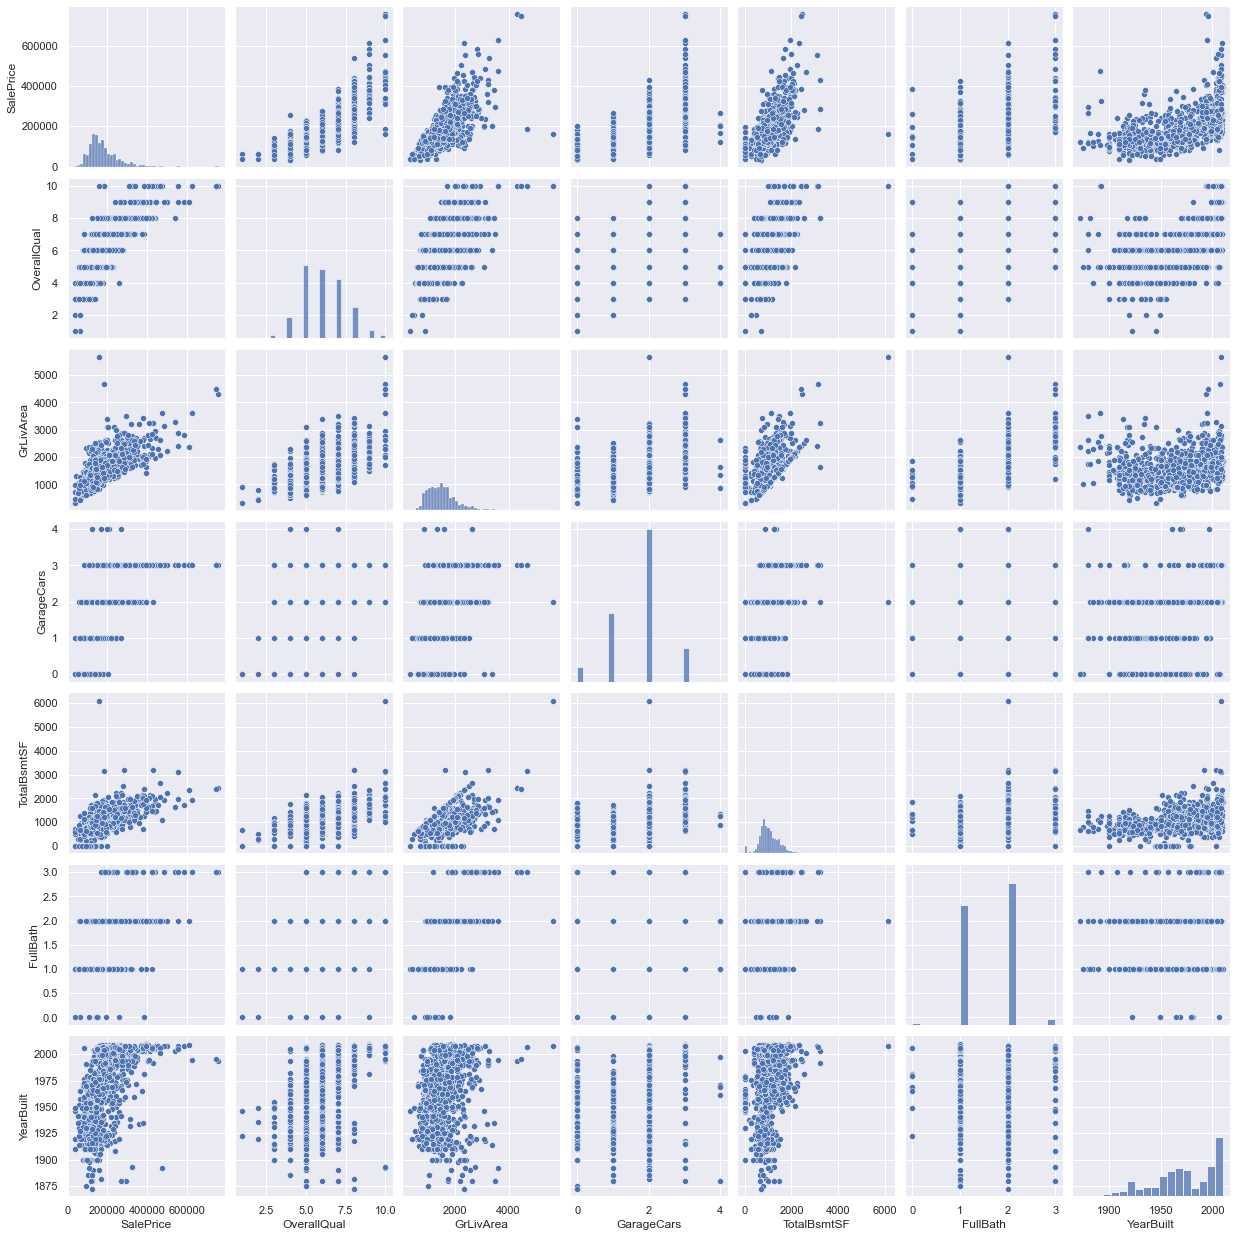

In [34]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols])
plt.show();

## Missing Data
* Missing data can imply a reduction of the sample size. This can prevent us from proceeding with the baised analysis

In [35]:
# amount of missing total
total_missing = train_df.isnull().sum().sort_values(ascending=False)
# amount of rows for each column, if train_df.count() > the null value will not be counted
total_rows = train_df.isnull().count()
# count the percentage of missing data for each column
missing_pct = (total_missing / total_rows * 100).sort_values(ascending = False)
missing_data = pd.concat([total_missing, missing_pct], axis = 1, keys = ['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


### Data Cleansing Rule
* If more than 15% of the data is missing, we should delete the corresponding variable.
* Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.
* Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential
* Therefore, above 0.5% of missing data should be dropped
* Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In [36]:
# make a dataframe with coulmns to drop
missing_data_drop = missing_data[missing_data['Percentage'] > 0.5].index
missing_data_drop
# drop columns with references to missing_data_drop
train_df = train_df.drop(columns = missing_data_drop)
# drop null value of 'Electrical' column
electrical_null = train_df.loc[train_df['Electrical'].isnull()].index # find the row first then its index
train_df = train_df.drop(electrical_null)
train_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Outlier of Univaraite and Bivariate Analysis
* Outliers can significantly affect our models and reliability of our insights
* Can analysze through standard deviation of 'SalePrice' and a set of scatter plots

### Univariate analysis (SalePrice)
Data standardization by converting SalePrice column to have mean of 0 and a standard deviation of 1

In [37]:
# make SalePrice Series as np 2darray
sale_price = train_df['SalePrice'][:,np.newaxis]

In [39]:
# standardizing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler
saleprice_scaled = sc().fit_transform(sale_price)
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [40]:
# find the low range and high range of data, .argsort() > sort the numpy array and then return its index
# saleprice_scaled (numpy array) > use indexing to get data in descening order
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('outer range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

### Bivariate analysis (saleprice/grlivarea)
* Look to scatter plots from a new perspective by taking outliers into considerations

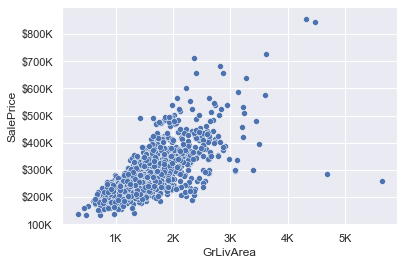

In [41]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
g = sns.scatterplot(x = var, y = 'SalePrice', data = train_df)
g.set(ylim=(0, 800000))
g.set_xticklabels(['0','1K','2K','3K','4K','5K', '6K']);
g.set_yticklabels(['100K', '$200K', '$300K', '$400K', '$500K', '$600K', '$700K', '$800K']);

### Obersvation
* The two biggest values of 'GrLivArea' do not follow the trend of increasing SalePrice
* Maybe they refer to agricultural area and that could explain the low price?
* We'll delete them as outliers

In [ ]:
# find the of those biggest points
train_Grliv_df = train_df.sort_values(by = 'GrLivArea', ascending=False)
train_Grliv_df = train_Grliv_df[['Id', 'GrLivArea', 'SalePrice']][:2].index
# drop rows by their indexes
train_df = train_df.drop(index = train_Grliv_df)

## Further Statistical Insights
1. Normality: the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). Thus, we'll check univariate normality for 'SalePrice'
2. Homoscedasticity: homoscedasticity means “having the same scatter.”. The opposite is heteroscedasticity (“different scatter”), where points are at widely varying distances from the regression line
3. Linearity: examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations
4. Absence of correlated errors: if one positive error makes a negative error systematically, it means that there's a relationship between these variables.

### Normality (SalePrice)
* Histogram - Kurtosis and skewness.
* Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

Before

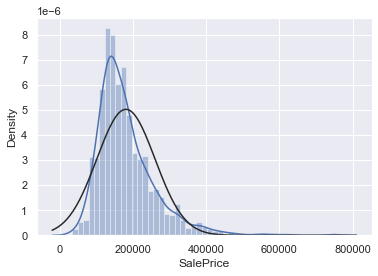

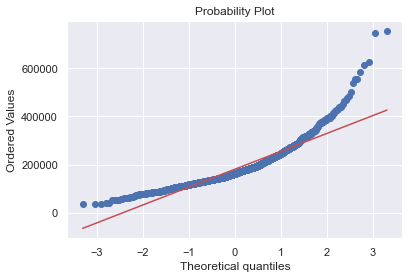

In [42]:
# univariate distribution (probability distribution) of observations
sns.distplot(train_df['SalePrice'], fit = norm) # fit = norm > fitting a gaussian distribution which is normally distributed

# Normal probability plot
fig = plt.figure() # create one more figure
res = stats.probplot(train_df['SalePrice'], plot=plt)

* 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the normal distribution
* In case of positive skewness, log transformations usually works well


After

In [43]:
# apply log function to the skewed data
train_df["SalePrice"] = np.log(train_df['SalePrice'])

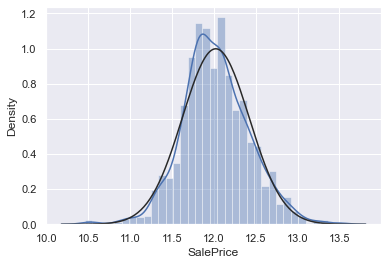

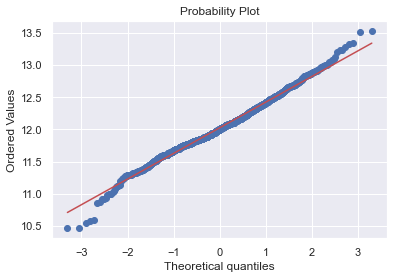

In [44]:
#transformed histogram and normal probability plot
sns.distplot(train_df['SalePrice'], fit = norm)

# Normal probability plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

### Normality (GrLivArea)

Before

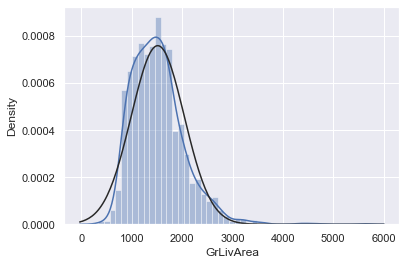

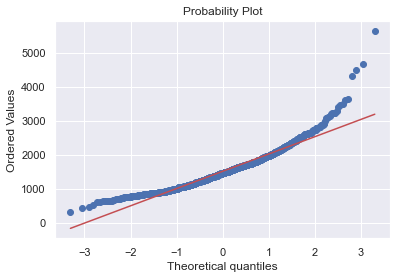

In [45]:
#histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot = plt)

After

In [46]:
# apply log function to GrLivArea
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])

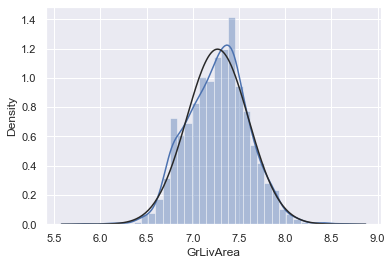

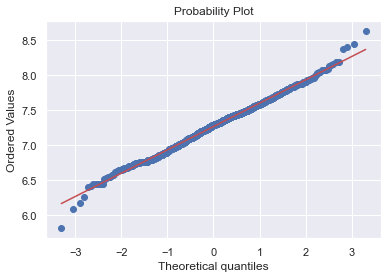

In [47]:
#transformed histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot = plt)

### Normality (TotalBsmtSF)
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

Before
* In general, it presents, though not strong, skewness.
* A significant number of observations with value zero (houses without basement).
* A big issue because  value zero doesn't allow us to apply log transformations.

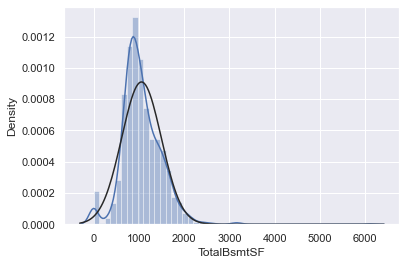

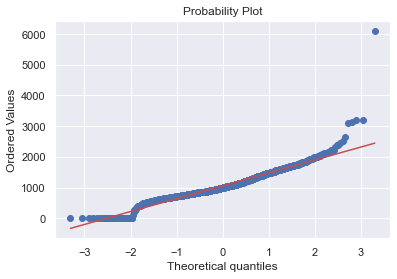

In [48]:
#histogram and normal probability plot
sns.distplot(train_df['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot = plt)

After

In [49]:
# create a binary column #if area>0 it gets 1, for area==0 it gets 0
def HasBas(x):
    if x > 0:
        return 1
    else:
        return 0
train_df['HasBsmt'] = train_df['TotalBsmtSF'].apply(HasBas)
train_df[['TotalBsmtSF', 'HasBsmt']]

,TotalBsmtSF,HasBsmt
0,856,1
1,1262,1
2,920,1
3,756,1
4,1145,1
...,...,...
1455,953,1
1456,1542,1
1457,1152,1
1458,1078,1


In [50]:
# apply log function to 'TotalBsmtSF' where HasBsmt==1 >>> only do log transformation to Bsmt > 0
train_df.loc[train_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

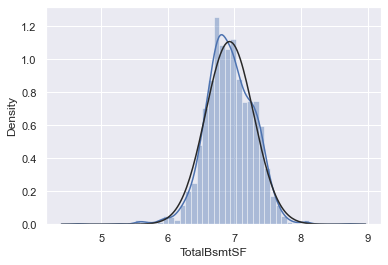

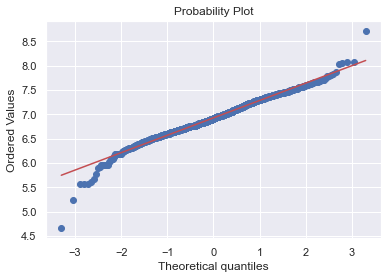

In [51]:
#histogram and normal probability plot
train_Bsmt = train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF']  # a serie not a dataframe

sns.distplot(train_Bsmt, fit = norm);
fig = plt.figure()
res = stats.probplot(train_Bsmt, plot = plt)

# In the search for writing 'homoscedasticity' 
* Test homoscedasticity two metric variables graphically
* Cones: small dispersion at one side of the graph, large dispersion at the opposite side
* Diamonds: a large number of points at the center of the distribution

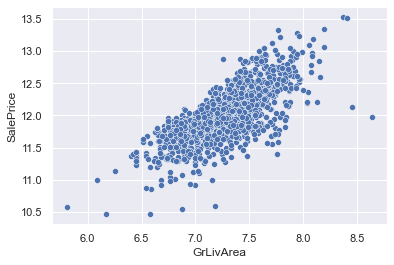

In [52]:
# Starting by 'SalePrice' and 'GrLivArea'
sns.scatterplot(x = train_df['GrLivArea'], y = train_df['SalePrice']);

* The current scatter plot (after log transformation) doesn't have a conic shape anymore, presenting normality. We have already solved the homoscedasticity problem.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

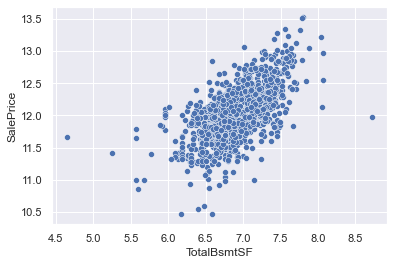

In [53]:
# 'SalePrice' with 'TotalBsmtSF'.
sns.scatterplot(x = train_Bsmt, y = train_df[train_df['TotalBsmtSF']>0]['SalePrice'])

In general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'.

### Lastly, dummy variables

In [54]:
df_train_dummy = pd.get_dummies(train_df)
df_train_dummy

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0
